## Importing Data & Libraries

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [ ]:
path = r'c:\users\vinor\01-2020 Instacart Basket Analysis'

## 1. Importing Latest version of merged dataset

In [53]:
df_ords_prods_custm = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', '4.9_ords_prods_custm.pkl'))

## 2. Consider any security implications that might exist for this new data

In [54]:
## This dataset contains customers details where customer name & other field are to be in data privacy. 
## To enhance data security, we can consider implementing encryption measures or removing the PII data, especially for fields containing 
## sensitive information. This ensures that even if unauthorized access occurs, the data remains protected.
# Delete the columns 'first_name' and 'last_name' and assign the results to a new dataframe
df_ords_prods_custm = df_ords_prods_custm.drop(['First Name', 'Surname'], axis=1)

## 3.a Create a “Region” column based on the “State” column from the customers data set

In [163]:
# Set max rows and columns to 50 and 40
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 40)

In [56]:
# Performed data wrangling for the customer data
df_ords_prods_custm.rename(columns = {'Gender' : 'gender'}, inplace = True)
df_ords_prods_custm.rename(columns = {'STATE' : 'state'}, inplace = True)
df_ords_prods_custm.rename(columns = {'Age' : 'age'}, inplace = True)
df_ords_prods_custm.rename(columns = {'Family_status' : 'family_status'}, inplace = True)
df_ords_prods_custm.rename(columns = {'Dependants' : 'dependants'}, inplace = True)
df_ords_prods_custm = df_ords_prods_custm.drop(['_merge', 'Unnamed: 0'], axis=1)

In [57]:
## Verify the changes 
df_ords_prods_custm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434212 entries, 0 to 32434211
Data columns (total 31 columns):
 #   Column                         Dtype         
---  ------                         -----         
 0   order_id                       int64         
 1   user_id                        int64         
 2   eval_set                       object        
 3   order_number                   int64         
 4   order_dow                      int64         
 5   order_hour_of_day              int64         
 6   days_since_prior_order         float64       
 7   product_id                     int64         
 8   add_to_cart_order              int64         
 9   reordered                      int64         
 10  product_name                   object        
 11  aisle_id                       int64         
 12  department_id                  int64         
 13  prices                         float64       
 14  price_range_loc                object        
 15  busiest_day  

In [58]:
## setting Northeast region
df_ords_prods_custm.loc[df_ords_prods_custm['state'].isin(['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']), 'region'] = 'Northeast'

In [59]:
## setting Midwest region
df_ords_prods_custm.loc[df_ords_prods_custm['state'].isin(['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']), 'region'] = 'Midwest'

In [60]:
## setting south region
df_ords_prods_custm.loc[df_ords_prods_custm['state'].isin(['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 
'Tennessee', 'Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']), 'region'] = 'South'

In [61]:
## setting west region
df_ords_prods_custm.loc[df_ords_prods_custm['state'].isin(['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 
'Oregon', 'California','Hawaii']), 'region'] = 'West'

In [62]:
# Verify the region update
df_ords_prods_custm['region'].value_counts(dropna = False)

region
South        10801610
West          8300445
Midwest       7603810
Northeast     5728347
Name: count, dtype: int64

## 3.b Analyse difference in spending habits between the different U.S. regions.

In [63]:
# Region wise price analysis
df_ords_prods_custm.groupby('region').agg({'prices': ['mean', 'min', 'max', 'sum']})

prices                           
                mean  min      max          sum
region                                         
Midwest    12.715745  1.0  99999.0   96688105.8
Northeast  11.556398  1.0  99999.0   66199058.8
South      12.196270  1.0  99999.0  131739354.6
West       11.321374  1.0  99999.0   93972442.8

In [64]:
region_spending_habits = df_ords_prods_custm.pivot_table(index = 'region', columns = 'spending_flag', aggfunc='size', fill_value=0)

In [65]:
region_spending_habits

spending_flag,High spender,Low spender
region,,
Midwest,156129,7447681
Northeast,108343,5620004
South,210182,10591428
West,160807,8139638


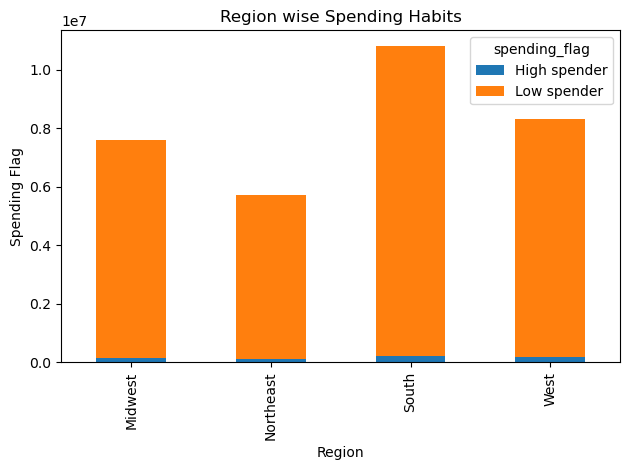

In [77]:
region_spending_habits.plot(kind='bar', stacked=True)
plt.title('Region wise Spending Habits')
plt.xlabel('Region')
plt.ylabel('Spending Flag')
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis','Visualization', 'Region_wise_Spending_Habits_10.3b.png'))
plt.show()

## South region has topped in spending sum as well spending counts, 
## Northeast has lowest sum of price as well low spending counts.
## Midwest has the top mean of price
## West has the lowest price mean

# 4. Create exclustion flag and filter data

In [19]:
# Create exclustion flag based on max order
df_ords_prods_custm['exclusion_flag'] = df_ords_prods_custm['max_order'] < 5

In [20]:
# Create data frame by nagatting the exclustion flag
df_orders_products_filtered = df_ords_prods_custm.loc[~df_ords_prods_custm['exclusion_flag']]

In [23]:
# Verify filtered data frame using head and tail
df_orders_products_filtered.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,prices_mean,spending_flag,days_since_prior_order_median,order_frequency_flag,gender,state,age,date_joined,dependants,family_status,income,region,exclusion_flag
0,2539329,1,prior,1,2,8,NaN,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423,South,False
1,2398795,1,prior,2,3,7,15.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423,South,False
2,473747,1,prior,3,3,12,21.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Slowest days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423,South,False
3,2254736,1,prior,4,4,7,29.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423,South,False
4,431534,1,prior,5,4,15,28.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Slowest days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423,South,False


In [24]:
df_orders_products_filtered.tail()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,prices_mean,spending_flag,days_since_prior_order_median,order_frequency_flag,gender,state,age,date_joined,dependants,family_status,income,region,exclusion_flag
32434203,3308056,106143,prior,22,4,20,10.0,19675,1,1,Organic Raspberry Black Tea,94,7,10.7,Mid-range product,Least busy,Slowest days,Average orders,26,Regular customer,10.7,High spender,7.0,Frequent customer,Male,Hawaii,25,2017-05-26,0,single,53755,West,False
32434204,2988973,106143,prior,23,2,22,5.0,19675,1,1,Organic Raspberry Black Tea,94,7,10.7,Mid-range product,Regularly busy,Regularly busy days,Average orders,26,Regular customer,10.7,High spender,7.0,Frequent customer,Male,Hawaii,25,2017-05-26,0,single,53755,West,False
32434205,930,106143,prior,24,6,12,4.0,19675,1,1,Organic Raspberry Black Tea,94,7,10.7,Mid-range product,Regularly busy,Regularly busy days,Most orders,26,Regular customer,10.7,High spender,7.0,Frequent customer,Male,Hawaii,25,2017-05-26,0,single,53755,West,False
32434206,467253,106143,prior,25,6,16,7.0,19675,1,1,Organic Raspberry Black Tea,94,7,10.7,Mid-range product,Regularly busy,Regularly busy days,Most orders,26,Regular customer,10.7,High spender,7.0,Frequent customer,Male,Hawaii,25,2017-05-26,0,single,53755,West,False
32434207,156685,106143,prior,26,4,23,5.0,19675,1,1,Organic Raspberry Black Tea,94,7,10.7,Mid-range product,Least busy,Slowest days,Fewest orders,26,Regular customer,10.7,High spender,7.0,Frequent customer,Male,Hawaii,25,2017-05-26,0,single,53755,West,False


In [25]:
# Export filtered data
df_orders_products_filtered.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_products_filtered_4.10.pkl'))

In [4]:
# Import back from file
df_orders_products_filtered = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_filtered_4.10.pkl'))

## 5. Create customer profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents.

In [5]:
# Chect the data values of variables considered for the profiling analysis
df_orders_products_filtered.agg({'age' : ['mean', 'min', 'max']})

,age
mean,49.467933
min,18.000000
max,81.000000


In [6]:
df_orders_products_filtered.agg({'income' : ['mean', 'min', 'max']})

,income
mean,99673.220008
min,25903.000000
max,593901.000000


In [7]:
df_orders_products_filtered.agg({'dependants' : ['mean', 'min', 'max']})

,dependants
mean,1.501798
min,0.000000
max,3.000000


In [8]:
df_orders_products_filtered.agg({'order_dow' : ['mean', 'min', 'max']})

,order_dow
mean,2.741342
min,0.000000
max,6.000000


In [9]:
# Define age groups
age_bins = [18, 25, 35, 45, 55, 65, 100]
age_labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']

# Create age group variable
df_orders_products_filtered['age_group'] = pd.cut(df_orders_products_filtered['age'], bins=age_bins, labels=age_labels)

In [10]:
# Define income groups
income_bins = [0, 50000, 100000, 150000, 200000, 300000, 999999]
income_labels = ['0-50k', '50k-100k', '100k-150k', '150k-200k', '200k-300k', '300k+']

df_orders_products_filtered['income_group'] = pd.cut(df_orders_products_filtered['income'], bins=income_bins, labels=income_labels)

In [11]:
# Define goods on department_id that define certain profiles
baby_products_department = 18 #  department_id 18 corresponds to 'babies'
pets_department = 8  # department_id 8 corresponds to 'pets'

df_orders_products_filtered['is_young_parent'] = df_orders_products_filtered['department_id'] == baby_products_department
df_orders_products_filtered['is_pet_owner'] = df_orders_products_filtered['department_id'] == pets_department

# Create a profiling variable based on age, income, certain goods, number of dependents, orders day of week, and order hour of day
df_orders_products_filtered['customer_profile'] = ''

In [12]:
df_orders_products_filtered.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,dependants,family_status,income,region,exclusion_flag,age_group,income_group,is_young_parent,is_pet_owner,customer_profile
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,3,married,40423,South,False,25-34,0-50k,False,False,
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,3,married,40423,South,False,25-34,0-50k,False,False,
2,473747,1,prior,3,3,12,21.0,196,1,1,...,3,married,40423,South,False,25-34,0-50k,False,False,
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,3,married,40423,South,False,25-34,0-50k,False,False,
4,431534,1,prior,5,4,15,28.0,196,1,1,...,3,married,40423,South,False,25-34,0-50k,False,False,


In [13]:
df_orders_products_filtered.tail()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,dependants,family_status,income,region,exclusion_flag,age_group,income_group,is_young_parent,is_pet_owner,customer_profile
32434203,3308056,106143,prior,22,4,20,10.0,19675,1,1,...,0,single,53755,West,False,18-24,50k-100k,False,False,
32434204,2988973,106143,prior,23,2,22,5.0,19675,1,1,...,0,single,53755,West,False,18-24,50k-100k,False,False,
32434205,930,106143,prior,24,6,12,4.0,19675,1,1,...,0,single,53755,West,False,18-24,50k-100k,False,False,
32434206,467253,106143,prior,25,6,16,7.0,19675,1,1,...,0,single,53755,West,False,18-24,50k-100k,False,False,
32434207,156685,106143,prior,26,4,23,5.0,19675,1,1,...,0,single,53755,West,False,18-24,50k-100k,False,False,


In [14]:
# Set income based profile 
# Low income group '0-50k', '50k-100k',
# Middle income group '100k-150k', '150k-200k',
# High income group '200k-300k',
# Upper income grou '300k+']
df_orders_products_filtered.loc[(df_orders_products_filtered['income_group'] == '0-50k') | (df_orders_products_filtered['income_group'] == '50k-100k'), 'customer_profile'] = 'Low Income'
df_orders_products_filtered.loc[(df_orders_products_filtered['income_group'] == '100k-150k') | (df_orders_products_filtered['income_group'] == '150k-200k'), 'customer_profile'] = 'Middle Income'
df_orders_products_filtered.loc[(df_orders_products_filtered['income_group'] == '200k-300k'), 'customer_profile'] = 'High Income'
df_orders_products_filtered.loc[(df_orders_products_filtered['income_group'] == '300k+'), 'customer_profile'] = 'Upper Income'

In [15]:
# Set customer profile for Single Adult based on age, income and dependants value
df_orders_products_filtered.loc[(df_orders_products_filtered['age_group'] == '25-34') & (df_orders_products_filtered['income_group'] == '0-50k') & (df_orders_products_filtered['dependants'] == 0), 'customer_profile'] = 'Single Adult'
df_orders_products_filtered.loc[(df_orders_products_filtered['age_group'] == '25-34') & (df_orders_products_filtered['income_group'] == '50k-100k') & (df_orders_products_filtered['dependants'] == 0), 'customer_profile'] = 'Single Adult'

In [16]:
# Set Young Parent Profile based on age, income and dependants
df_orders_products_filtered.loc[(df_orders_products_filtered['age_group'] == '25-34') & (df_orders_products_filtered['income_group'] == '50k-100k') & df_orders_products_filtered['is_young_parent'] & (df_orders_products_filtered['dependants'] > 0), 'customer_profile'] = 'Young Parent'

# Set Pet Owner Profile based on age, income and dependants
df_orders_products_filtered.loc[(df_orders_products_filtered['income_group'] != '0-50k') & df_orders_products_filtered['is_pet_owner'], 'customer_profile'] = 'Pet Owner'

# Verify the updated 
print(df_orders_products_filtered[['age_group', 'income_group', 'is_young_parent', 'is_pet_owner', 'dependants', 'customer_profile']])

         age_group income_group  is_young_parent  is_pet_owner  dependants  \
0            25-34        0-50k            False         False           3   
1            25-34        0-50k            False         False           3   
2            25-34        0-50k            False         False           3   
3            25-34        0-50k            False         False           3   
4            25-34        0-50k            False         False           3   
...            ...          ...              ...           ...         ...   
32434203     18-24     50k-100k            False         False           0   
32434204     18-24     50k-100k            False         False           0   
32434205     18-24     50k-100k            False         False           0   
32434206     18-24     50k-100k            False         False           0   
32434207     18-24     50k-100k            False         False           0   

         customer_profile  
0              Low Income  
1      

In [17]:
# Verif the Customer profile
df_orders_products_filtered['customer_profile'].value_counts(dropna = False)

customer_profile
Low Income       15512054
Middle Income    13921547
Single Adult      1183538
High Income        153084
Upper Income        99323
Pet Owner           84452
Young Parent        38666
Name: count, dtype: int64

# 6. Create an appropriate visualization to show the distribution of profiles.

In [18]:
age_group_spending_habits = df_orders_products_filtered.pivot_table(index = 'age_group', columns = 'spending_flag', aggfunc='size', fill_value=0)

In [19]:
age_group_spending_habits

spending_flag,High spender,Low spender
age_group,,
18-24,64817,3324517
25-34,88343,4790270
35-44,99962,4732438
45-54,100051,4793798
55-64,95824,4686193
65+,146339,7591280


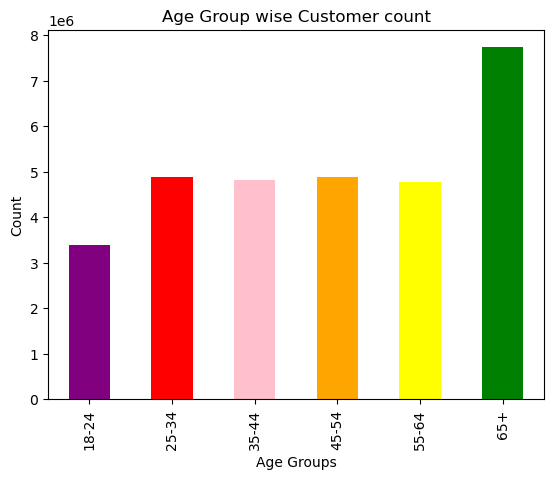

In [20]:
# Age Group wise Customer count
bar = df_orders_products_filtered['age_group'].value_counts().sort_index().plot.bar(color = ['purple', 'red', 'pink', 'orange', 'yellow', 'green'])

plt.title('Age Group wise Customer count')
plt.xlabel('Age Groups')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [68]:
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualization', 'Age_Group_wise_Customer_count_4.10.png'))

In [69]:
income_group_spending_habits = df_orders_products_filtered.pivot_table(index = 'income_group', columns = 'spending_flag', aggfunc='size', fill_value=0)

In [70]:
income_group_spending_habits

spending_flag,High spender,Low spender
income_group,,
0-50k,2027,3364122
50k-100k,78224,13329247
100k-150k,135235,10185901
150k-200k,134808,3508810
200k-300k,154220,0
300k+,100070,0


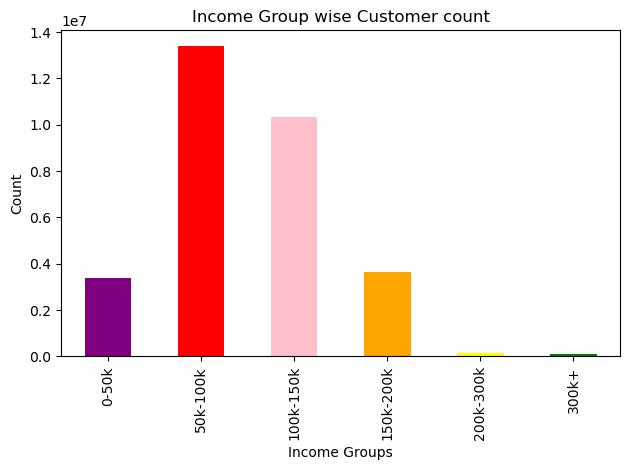

In [71]:
# Income Group wise Customer count
bar = df_orders_products_filtered['income_group'].value_counts().sort_index().plot.bar(color = ['purple', 'red', 'pink', 'orange', 'yellow', 'green'])

plt.title('Income Group wise Customer count')
plt.xlabel('Income Groups')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [72]:
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualization', 'Income_Group_wise_Customer_count_4.10.png'))

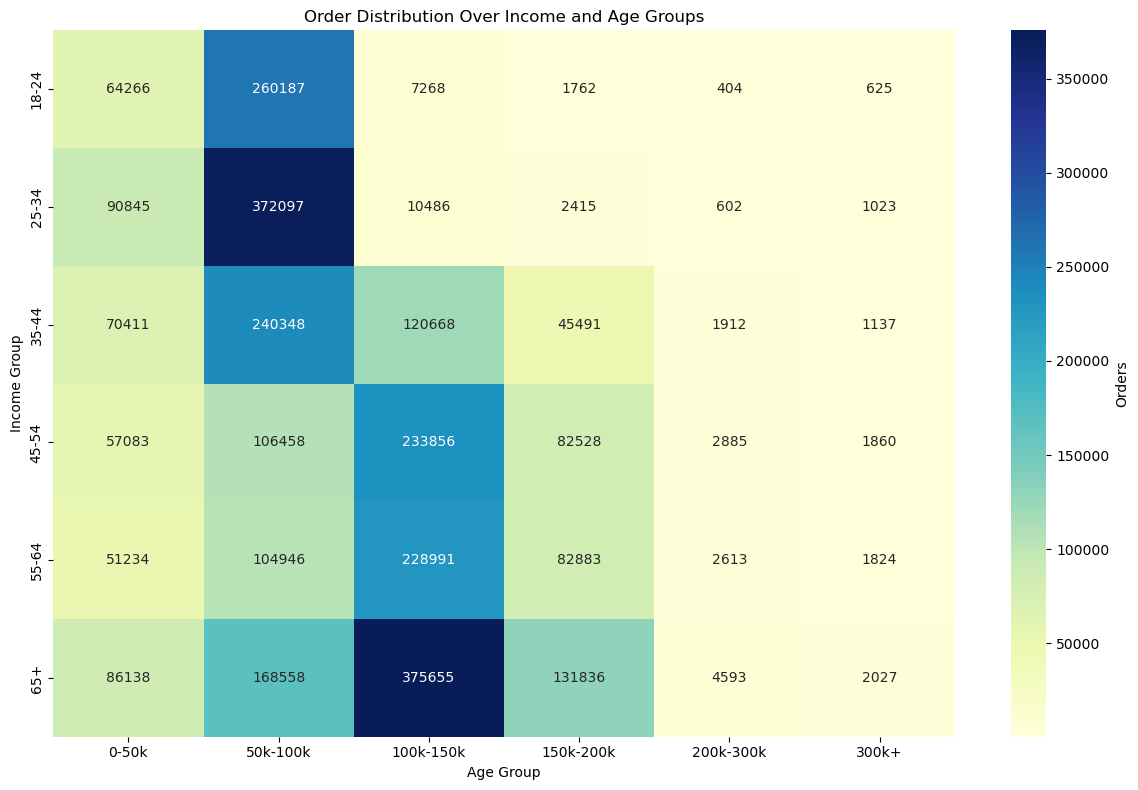

In [206]:
# Create a pivot table with order_dow and age_group
pivot_table = df_orders_products_filtered.pivot_table(
    index='age_group', columns='income_group', values='order_id', aggfunc='nunique', fill_value=0
)

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='g', cbar_kws={'label': 'Orders'})
plt.title('Order Distribution Over Income and Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Income Group')

plt.tight_layout()

plt.savefig(os.path.join(path, '04 Analysis','Visualization', 'Order_Distribution_Income_Age_Group_10.6.png'))

plt.show()

## Heatmap on order distribution over the Income and Age Group indicates most orders are from 50-150k income group 
## at the same time when the income is 50-100k the age is 25-34, when the income is 100-150k the age group is 65+
## Middle income in young age group is most ordering 
## Or Old age with High income group is most ordering

In [73]:
customer_profile_spending_habits = df_orders_products_filtered.pivot_table(index = 'customer_profile', columns = 'spending_flag', aggfunc='size', fill_value=0)

In [74]:
customer_profile_spending_habits

spending_flag,High spender,Low spender
customer_profile,,
High Income,153084,0
Low Income,76399,15435655
Middle Income,268276,13653271
Pet Owner,3963,80489
Single Adult,3413,1180125
Upper Income,99323,0
Young Parent,126,38540


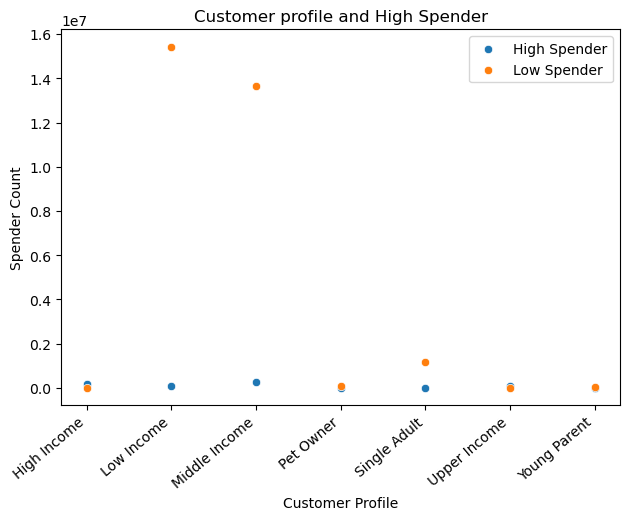

In [75]:
plt.xticks(rotation = 40, ha = 'right') 
plt.title('Customer profile and High Spender')
plt.xlabel('Customer Profile')
plt.ylabel('Spender Count')
plt.tight_layout()
scat_cp_hs = sns.scatterplot(x = 'customer_profile', y = 'High spender', data = customer_profile_spending_habits, label='High Spender')
scat_cp_hs = sns.scatterplot(x = 'customer_profile', y = 'Low spender', data = customer_profile_spending_habits, label='Low Spender')

In [76]:
scat_cp_hs.figure.savefig(os.path.join(path, '04 Analysis','Visualization', 'Customer_profile_spending_behaviour_4.10.png'))

# 7. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [82]:
# Aggregate on order frequency
df_orders_products_filtered.groupby('customer_profile').agg({'max_order': ['mean', 'min', 'max', 'sum']})

max_order                   
                       mean min max        sum
customer_profile                              
High Income       38.079623   5  99    5829381
Low Income        34.289704   5  99  531903736
Middle Income     34.519954   5  99  480571167
Pet Owner         31.181440   5  99    2633335
Single Adult      34.371816   5  99   40680350
Upper Income      38.594797   5  99    3833351
Young Parent      38.555889   5  99    1490802

In [85]:
# Aggregate on price mean
df_orders_products_filtered.groupby('customer_profile').agg({'prices_mean': ['mean', 'min', 'max', 'sum']})

prices_mean                                       
                        mean        min           max           sum
customer_profile                                                   
High Income       248.846620  24.103300   7414.485185  3.809444e+07
Low Income          8.102340   1.000000   5135.893590  1.256839e+08
Middle Income      12.122315   7.000000  15006.940000  1.687614e+08
Pet Owner          16.124751   3.954545   6390.138298  1.361767e+06
Single Adult        8.041647   1.800000   3453.431034  9.517594e+06
Upper Income      263.241083  24.405998   6388.812766  2.614589e+07
Young Parent        8.184604   7.001786    637.933099  3.164659e+05

In [112]:
aggregated_stats = df_orders_products_filtered.groupby(['region', 'customer_profile']).agg({
    'max_order': 'mean',
    'prices': 'mean',
    'income': 'mean',
}).reset_index()

In [113]:
aggregated_stats

,region,customer_profile,max_order,prices,income
0,Midwest,High Income,38.688091,241.950943,251621.880431
1,Midwest,Low Income,33.533656,8.412930,68971.769852
2,Midwest,Middle Income,34.292360,13.356409,132186.358543
3,Midwest,Pet Owner,31.059776,7.934313,109854.665406
4,Midwest,Single Adult,33.722796,8.567048,69115.453481
5,Midwest,Upper Income,37.639651,230.182586,425264.853965
6,Midwest,Young Parent,40.142683,7.735649,73227.576264
7,Northeast,High Income,36.050717,224.805591,253263.173410
8,Northeast,Low Income,34.571040,7.874328,69237.883323
9,Northeast,Middle Income,34.524964,12.341016,132532.803402


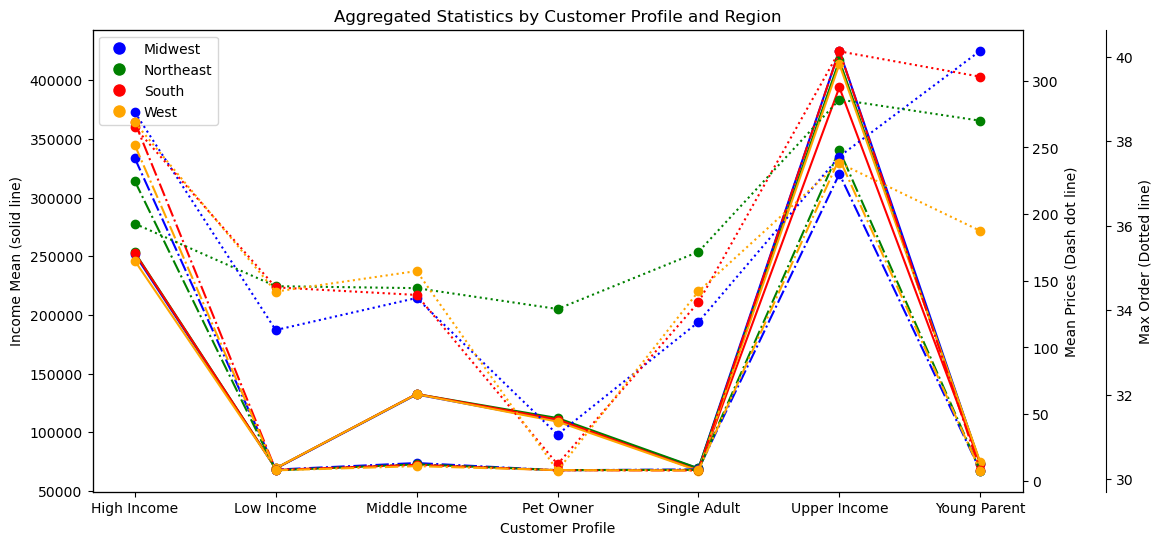

In [122]:
# Define colors for each region
colors = {'Midwest': 'blue', 'Northeast': 'green', 'South': 'red', 'West': 'Orange'}  

# Create a line chart with a secondary y-axis
fig, ax1 = plt.subplots(figsize=(12, 6))

for region, color in colors.items():
    region_data = aggregated_stats[aggregated_stats['region'] == region]

    # Line chart on income mean on the primary y-axis
    ax1.plot(region_data['customer_profile'], region_data['income'], label=f'Mean Income ({region})', marker='o', linestyle='solid', color=color)

# Set labels for the primary y-axis
ax1.set_xlabel('Customer Profile')
ax1.set_ylabel('Income Mean (solid line)')
ax1.tick_params(axis='y')

# Create a secondary y-axis
ax2 = ax1.twinx()
for region, color in colors.items():
    region_data = aggregated_stats[aggregated_stats['region'] == region]

    # Line chart for mean_prices on the secondary y-axis
    ax2.plot(region_data['customer_profile'], region_data['prices'], label=f'Mean Prices ({region})', marker='o', linestyle='dashdot', color=color)

# Set labels for the secondary y-axis
ax2.set_ylabel('Mean Prices (Dash dot line)')
ax2.tick_params(axis='y')

# Create a third y-axis
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))  # Adjust the position
for region, color in colors.items():
    region_data = aggregated_stats[aggregated_stats['region'] == region]

    # Line chart for max_order on the third y-axis
    ax3.plot(region_data['customer_profile'], region_data['max_order'], label=f'Max Order ({region})', marker='o', linestyle='dotted', color=color)

# Set labels for the third y-axis
ax3.set_ylabel('Max Order (Dotted line)')
ax3.tick_params(axis='y')

# Set title
plt.title('Aggregated Statistics by Customer Profile and Region')

# Add legend
handles, labels = [], []
for region, color in colors.items():
    handles.extend([plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10)])
    labels.extend([f'{region}'])
ax1.legend(handles, labels, loc='upper left')

plt.tight_layout()

# Export chart
plt.savefig(os.path.join(path, '04 Analysis','Visualization', 'Aggregated_Statistics_by_Customer_Profile_and_Region_10.7.png'))

# Show the plot
plt.show()

# 8. Comparing customer profiles with regions and departments. Identifing a link between them. Customers may demonstrate different behaviors across regions, which could make this information important.

In [136]:
# Load department
df_departments = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'))

In [137]:
# Rename the remaining column to 'department_id'
df_departments = df_departments.rename(columns={'Unnamed: 0': 'department_id'})

In [138]:
df_departments

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [139]:
df_orders_products_filtered = pd.merge(df_orders_products_filtered, df_departments, on='department_id', how='inner')

In [140]:
# Verif the Customer profile
df_orders_products_filtered['department'].value_counts(dropna = False)

department
produce            9079276
dairy eggs         5191828
snacks             2766406
beverages          2571934
frozen             2123342
pantry             1782903
bakery             1125026
canned goods       1012074
deli               1003834
dry goods pasta     822136
household           699858
breakfast           678095
meat seafood        674785
personal care       424415
babies              410392
international       255991
alcohol             144674
pets                 93065
missing              64768
other                34411
bulk                 33451
Name: count, dtype: int64

In [16]:
df_orders_products_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30992664 entries, 0 to 30992663
Data columns (total 39 columns):
 #   Column                         Dtype         
---  ------                         -----         
 0   order_id                       int64         
 1   user_id                        int64         
 2   eval_set                       object        
 3   order_number                   int64         
 4   order_dow                      int64         
 5   order_hour_of_day              int64         
 6   days_since_prior_order         float64       
 7   product_id                     int64         
 8   add_to_cart_order              int64         
 9   reordered                      int64         
 10  product_name                   object        
 11  aisle_id                       int64         
 12  department_id                  int64         
 13  prices                         float64       
 14  price_range_loc                object        
 15  busiest_day  

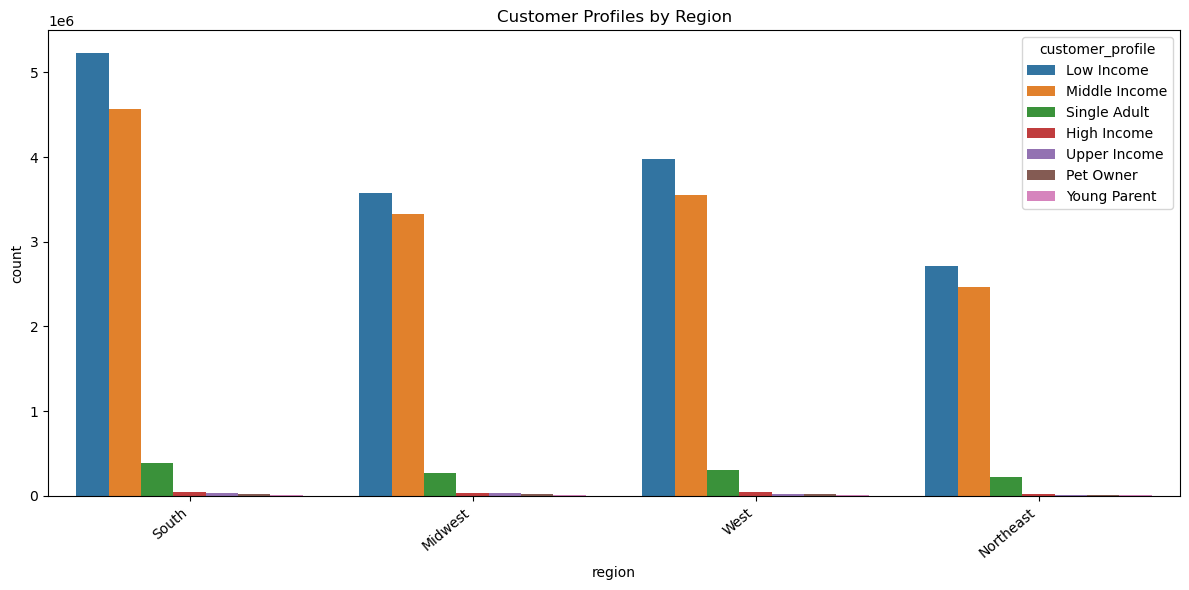

In [12]:
# Bar chart for customer profiles by region
plt.figure(figsize=(12, 6))
plt.xticks(rotation = 40, ha = 'right') 
plt.title('Customer Profiles by Region')
plt.xlabel('Region')
plt.ylabel('Count')
sns.countplot(x='region', hue='customer_profile', data=df_orders_products_filtered)
plt.tight_layout()
# Export chart
plt.savefig(os.path.join(path, '04 Analysis','Visualization', 'Customer_Profiles_by_Region_10.8.png'))
plt.show()

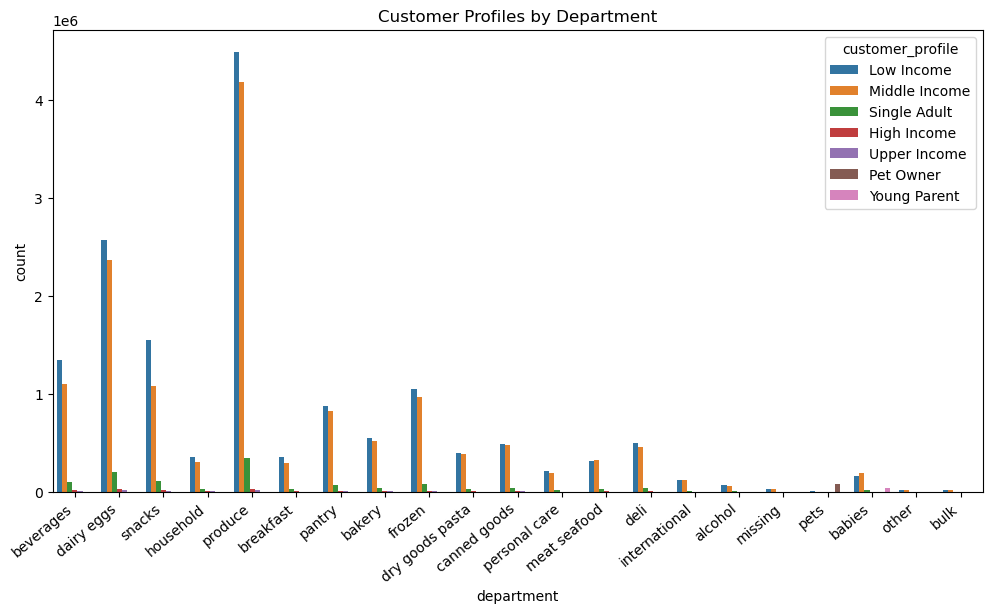

In [145]:
# Bar chart for customer profiles by department
plt.figure(figsize=(12, 6))
plt.xticks(rotation = 40, ha = 'right') 
plt.title('Customer Profiles by Department')
plt.xlabel('Department')
plt.ylabel('Count')
plt.tight_layout()
sns.countplot(x='department', hue='customer_profile', data=df_orders_products_filtered)
plt.savefig(os.path.join(path, '04 Analysis','Visualization', 'Customer_Profiles_by_Department_10.8.png'))
plt.show()

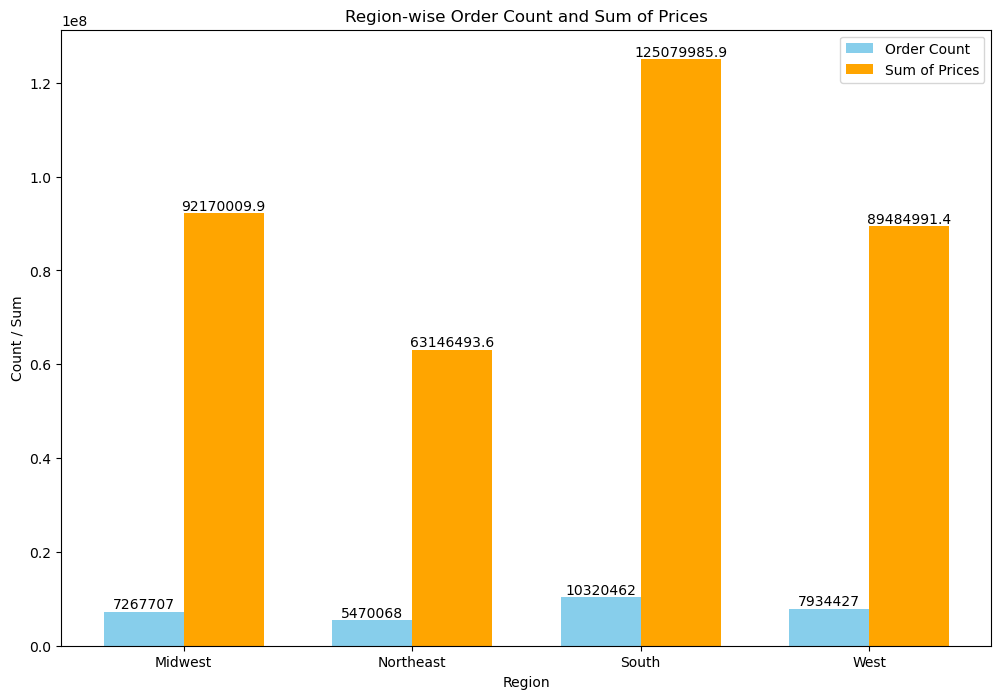

In [11]:
# Group by region and calculate order count and sum of prices
region_order_stats = df_orders_products_filtered.groupby('region').agg({
    'order_id': 'count',
    'prices': 'sum'
}).reset_index()

# Create a grouped bar chart
fig, ax = plt.subplots(figsize=(12, 8))

bar_width = 0.35
bar_positions = range(len(region_order_stats))

# Bar chart for order count
order_count_bar = ax.bar(bar_positions, region_order_stats['order_id'], width=bar_width, label='Order Count', color='skyblue')

# Bar chart for sum of prices
sum_of_prices_bar = ax.bar([pos + bar_width for pos in bar_positions], region_order_stats['prices'], width=bar_width, label='Sum of Prices', color='orange')

# Annotate the bars with actual values
for bars, values in zip([order_count_bar, sum_of_prices_bar], [region_order_stats['order_id'], region_order_stats['prices']]):
    for bar, value in zip(bars, values):
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f"{value}",
                ha='center', va='bottom', color='black')

ax.set_xlabel('Region')
ax.set_ylabel('Count / Sum')
ax.set_xticks([pos + bar_width / 2 for pos in bar_positions])
ax.set_xticklabels(region_order_stats['region'])
ax.legend()

plt.title('Region-wise Order Count and Sum of Prices')
plt.savefig(os.path.join(path, '04 Analysis','Visualization', 'Customer_Profiles_by_Region_10.8.1.png'))

plt.show()

C:\Users\vinor\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vinor\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vinor\AppData\Local\Temp\ipykernel_28000\3914996586.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')  # Rotate x-axis labels for better readability


<Figure size 1200x800 with 0 Axes>

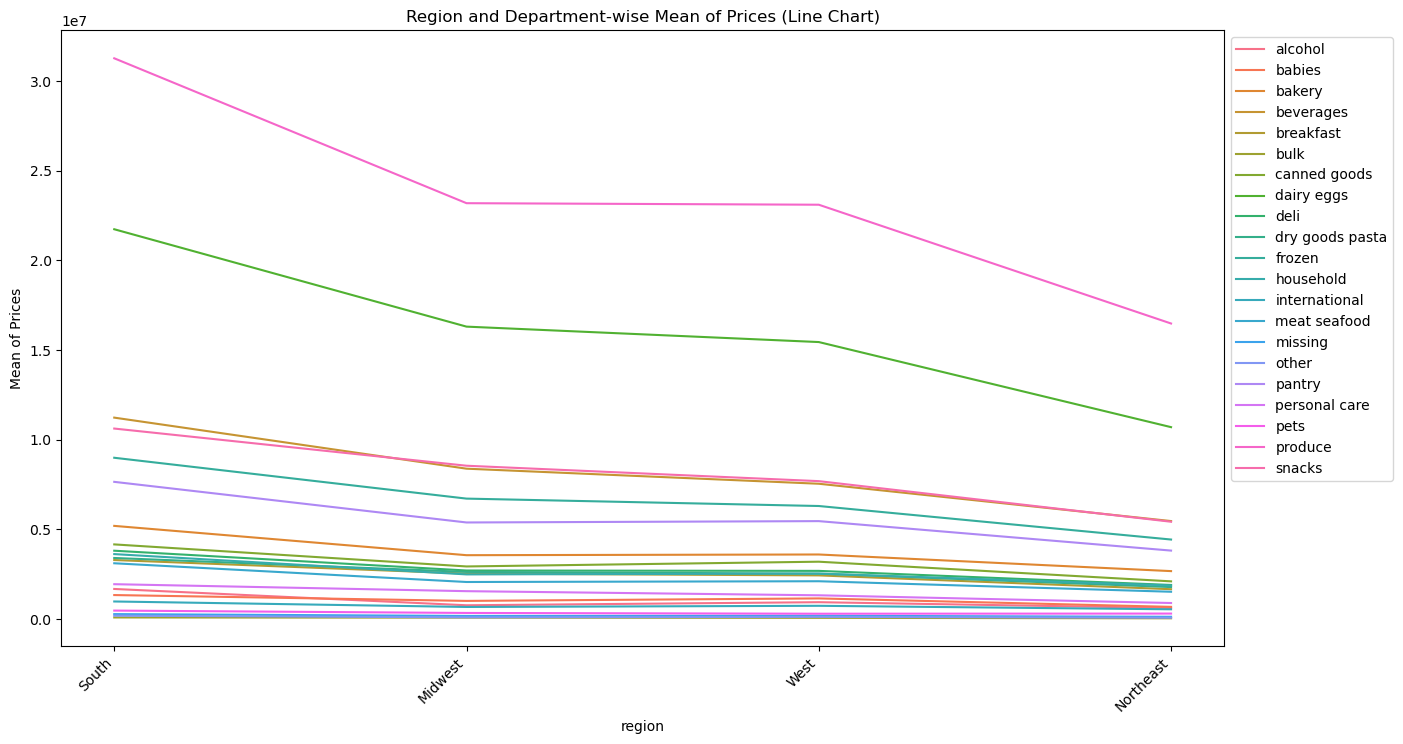

In [41]:
# Group by loyalty_flag and department and calculate mean of prices
loyalty_department_stats = df_orders_products_filtered.groupby(['region', 'department']).agg({
    'prices_mean': 'sum'
}).reset_index()

plt.figure(figsize=(12, 8))
plt.tight_layout()

# Convert 'region' to categorical data type
loyalty_department_stats['region'] = pd.Categorical(loyalty_department_stats['region'], categories=df_orders_products_filtered['region'].unique())

# Create a line chart using seaborn with 'loyalty_flag' on the x-axis
fig, ax = plt.subplots(figsize=(15, 8))

sns.lineplot(x='region', y='prices_mean', hue='department', data=loyalty_department_stats, ax=ax)
ax.set_xlabel('region')
ax.set_ylabel('Mean of Prices')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Place legend outside the chart area
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.title('Region and Department-wise Mean of Prices (Line Chart)')
plt.savefig(os.path.join(path, '04 Analysis','Visualization', 'Differences_in_ordering_habits_based_customer_region_10.8.png'))
plt.show()


C:\Users\vinor\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vinor\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vinor\AppData\Local\Temp\ipykernel_28000\3540663792.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')  # Rotate x-axis labels for better readability


<Figure size 1200x800 with 0 Axes>

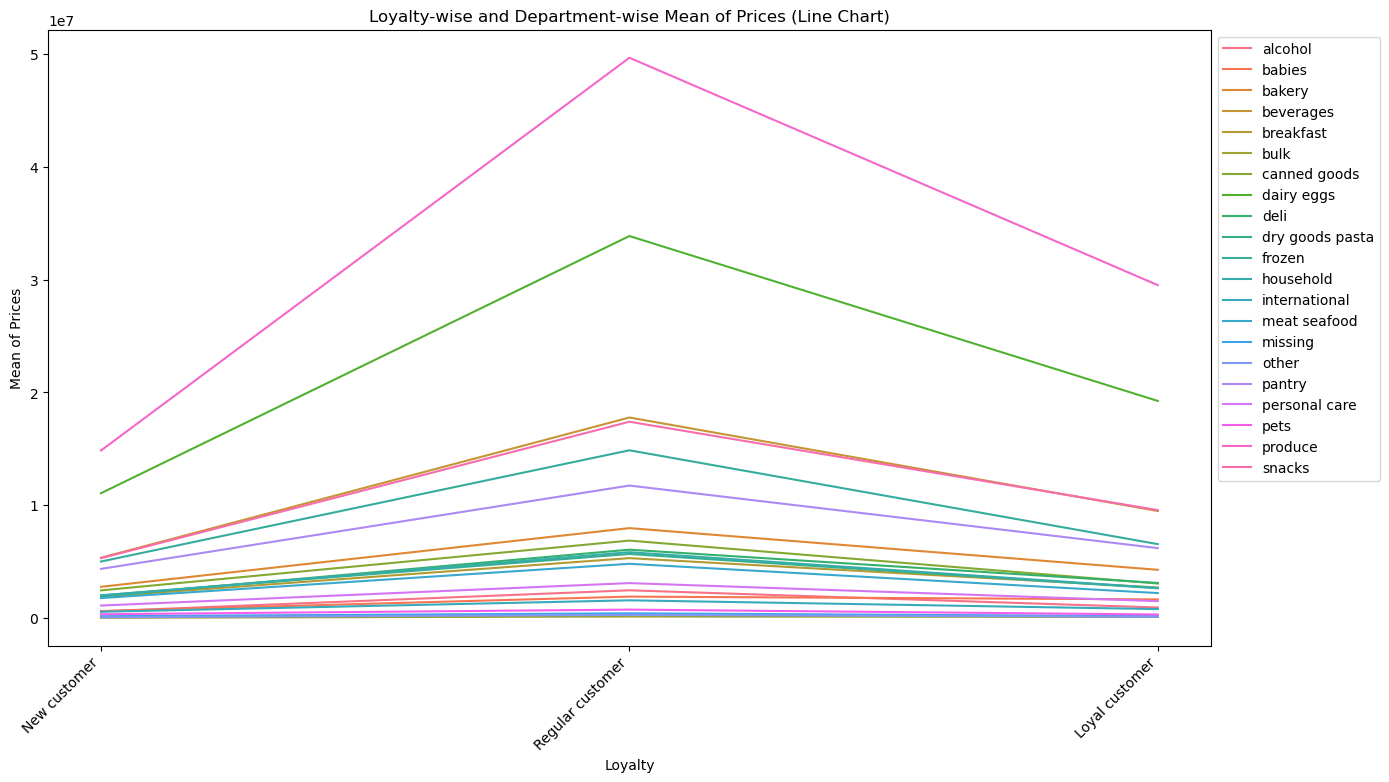

In [40]:
# Group by loyalty_flag and department and calculate mean of prices
loyalty_department_stats = df_orders_products_filtered.groupby(['loyalty_flag', 'department']).agg({
    'prices_mean': 'sum'
}).reset_index()

plt.figure(figsize=(12, 8))
plt.tight_layout()

# Convert 'loyalty_flag' to categorical data type
loyalty_department_stats['loyalty_flag'] = pd.Categorical(loyalty_department_stats['loyalty_flag'], categories=df_orders_products_filtered['loyalty_flag'].unique())

# Create a line chart using seaborn with 'loyalty_flag' on the x-axis
fig, ax = plt.subplots(figsize=(15, 8))

sns.lineplot(x='loyalty_flag', y='prices_mean', hue='department', data=loyalty_department_stats, ax=ax)
ax.set_xlabel('Loyalty')
ax.set_ylabel('Mean of Prices')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Place legend outside the chart area
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.title('Loyalty-wise and Department-wise Mean of Prices (Line Chart)')
plt.savefig(os.path.join(path, '04 Analysis','Visualization', 'Differences_in_ordering_habits_based_customer_loyalty_10.8.png'))
plt.show()


In [147]:
from scipy.stats import chi2_contingency
region_profile_crosstab = pd.crosstab(df_orders_products_filtered['region'], df_orders_products_filtered['customer_profile'])
chi2, p, _, _ = chi2_contingency(region_profile_crosstab)
print(f'Chi-square test for regions and customer profiles: Chi2={chi2}, p-value={p}')

Chi-square test for regions and customer profiles: Chi2=9338.44300911732, p-value=0.0


### The Chi-square test result indicates a significant association between regions and customer profiles, as the p-value is less than the commonly used significance level of 0.05. The p-value of 0.0 suggests that there is a very low probability of observing such an extreme association between regions and customer profiles by chance alone.

In [149]:
# Chi-square test for association between customer profiles and departments
department_profile_crosstab = pd.crosstab(df_orders_products_filtered['department'], df_orders_products_filtered['customer_profile'])
chi2, p, _, _ = chi2_contingency(department_profile_crosstab)
print(f'Chi-square test for departments and customer profiles: Chi2={chi2}, p-value={p}')

Chi-square test for departments and customer profiles: Chi2=31110730.976603657, p-value=0.0


### The Chi-square test result for departments and customer profiles also indicates a highly significant association between the two variables, as the p-value is very close to zero. 

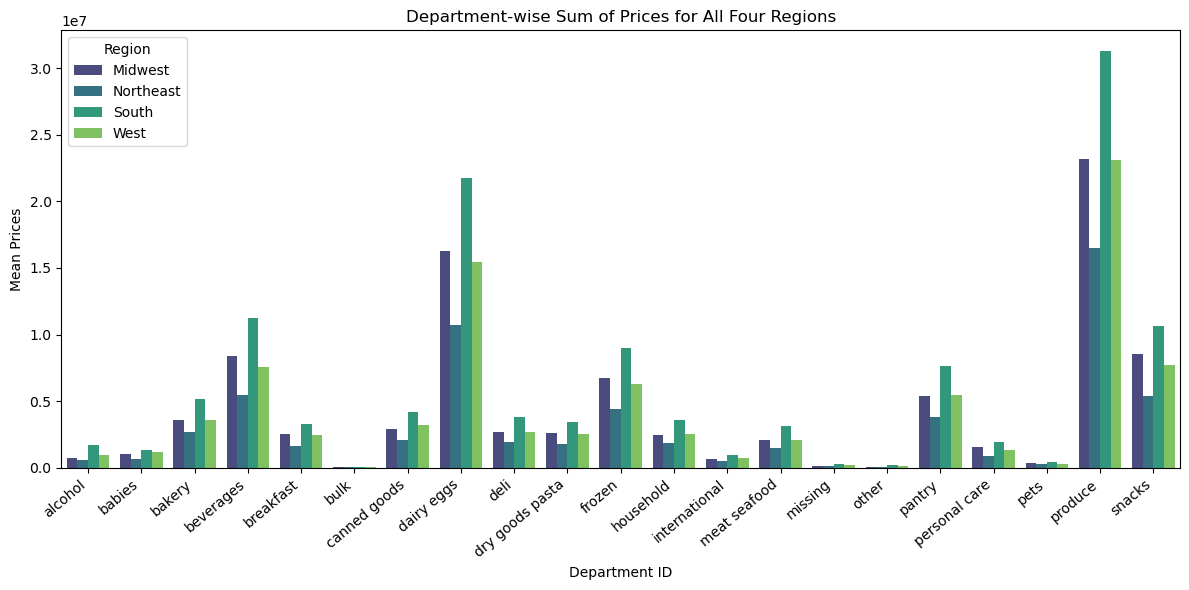

In [203]:
grouped_data = df_orders_products_filtered.groupby(['region', 'department'])['prices_mean'].sum().reset_index()

# Create a grouped bar chart
plt.figure(figsize=(12, 6))
plt.xticks(rotation = 40, ha = 'right') 
sns.barplot(x='department', y='prices_mean', hue='region', data=grouped_data, palette='viridis')

# Set labels and title
plt.xlabel('Department ID')
plt.ylabel('Mean Prices')
plt.title('Department-wise Sum of Prices for All Four Regions')

# Add legend
plt.legend(title='Region')
plt.tight_layout()

plt.savefig(os.path.join(path, '04 Analysis','Visualization', 'Department_Prices_Regions_10.8.png'))

# Show the plot
plt.show()

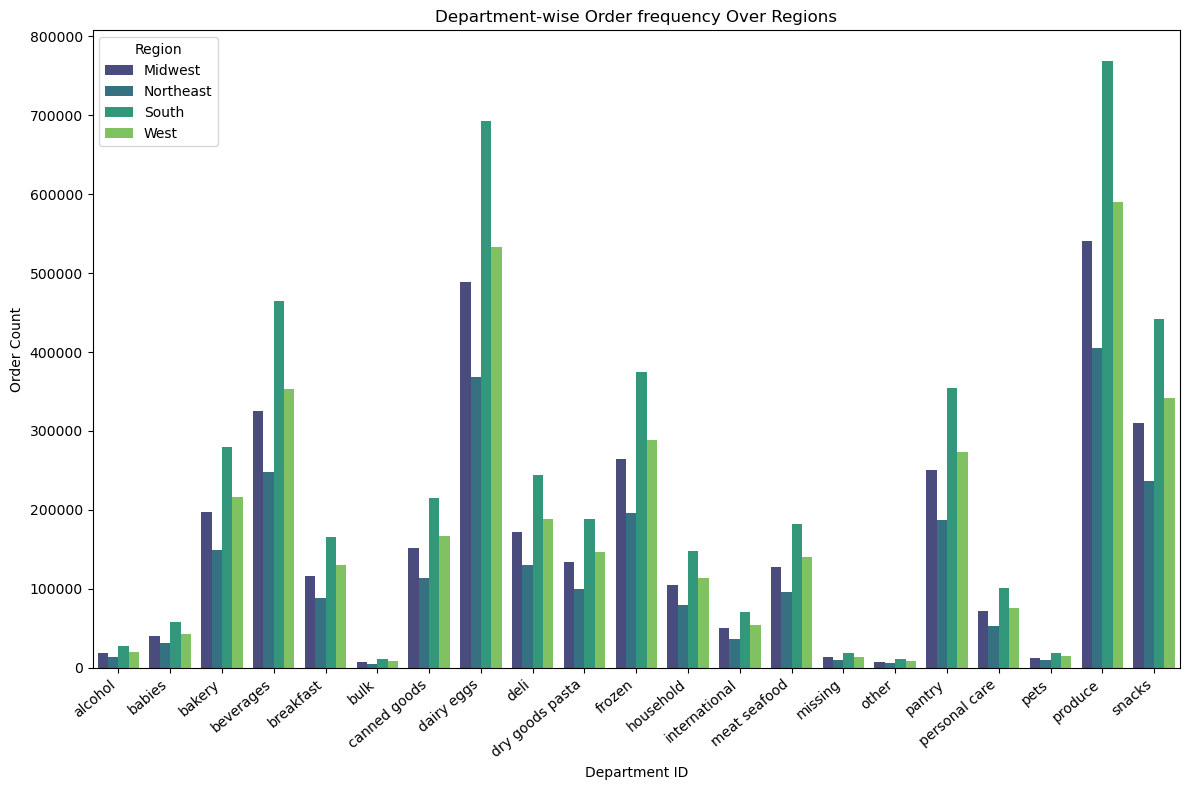

In [201]:
grouped_data = df_orders_products_filtered.groupby(['region', 'department'])['order_id'].nunique().reset_index()

# Create a grouped bar chart
plt.figure(figsize=(12, 8))
plt.xticks(rotation = 40, ha = 'right') 
sns.barplot(x='department', y='order_id', hue='region', data=grouped_data, palette='viridis')

# Set labels and title
plt.xlabel('Department ID')
plt.ylabel('Order Count')
plt.title('Department-wise Order frequency Over Regions')

# Add legend
plt.legend(title='Region')
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis','Visualization', 'Department_Order_Frequency_Regions_10.8.png'))

# Show the plot
plt.show()

## Both price mean and order count reflects the order of South, West, Midwest and Northeast region in sales. 
## Prdouce, Dairy eggs, Beverages, Snacks, Froyen, Pantry, Bakery are the most selling departments. 
## Deli, Canned goods, Dry goods pasta, Meat seafood, Breakfast and Household are the average selling departments. 
## Bulk, Other, Missing, Pets, Alcohol, Babies and International are least selling departments.

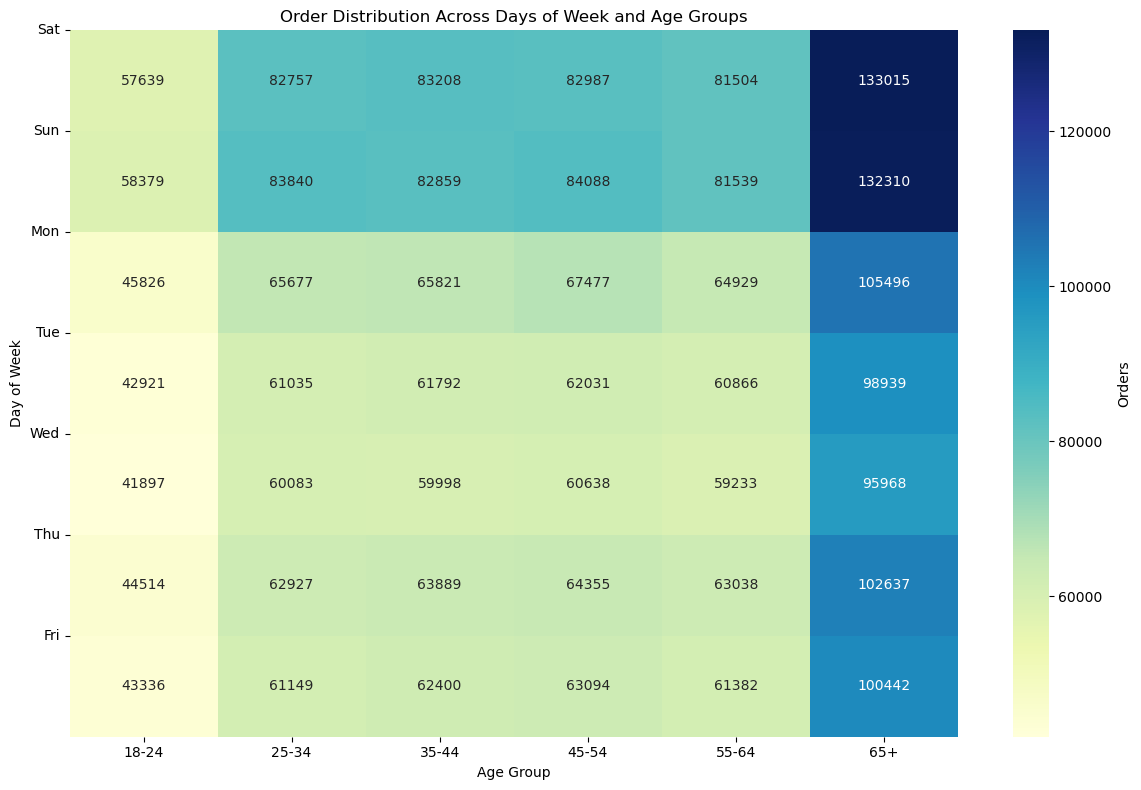

In [14]:
# Create a pivot table with order_dow and age_group
pivot_table = df_orders_products_filtered.pivot_table(
    index='order_dow', columns='age_group', values='order_id', aggfunc='nunique', fill_value=0
)

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='g', cbar_kws={'label': 'Orders'})
plt.title('Order Distribution Across Days of Week and Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Day of Week')

plt.yticks(ticks=range(7), labels=['Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri'], rotation=0)

plt.tight_layout()

plt.savefig(os.path.join(path, '04 Analysis','Visualization', 'Order_Distribution_Over_DOW_And_Age_Group_10.8.png'))

plt.show()

## Heat map analysis over the Age group on Day of week and order count
## Saturday, Sunday has most orders compared to all other days. 
## Age group 65+ are the most odering 
## The orders are in relation to age group

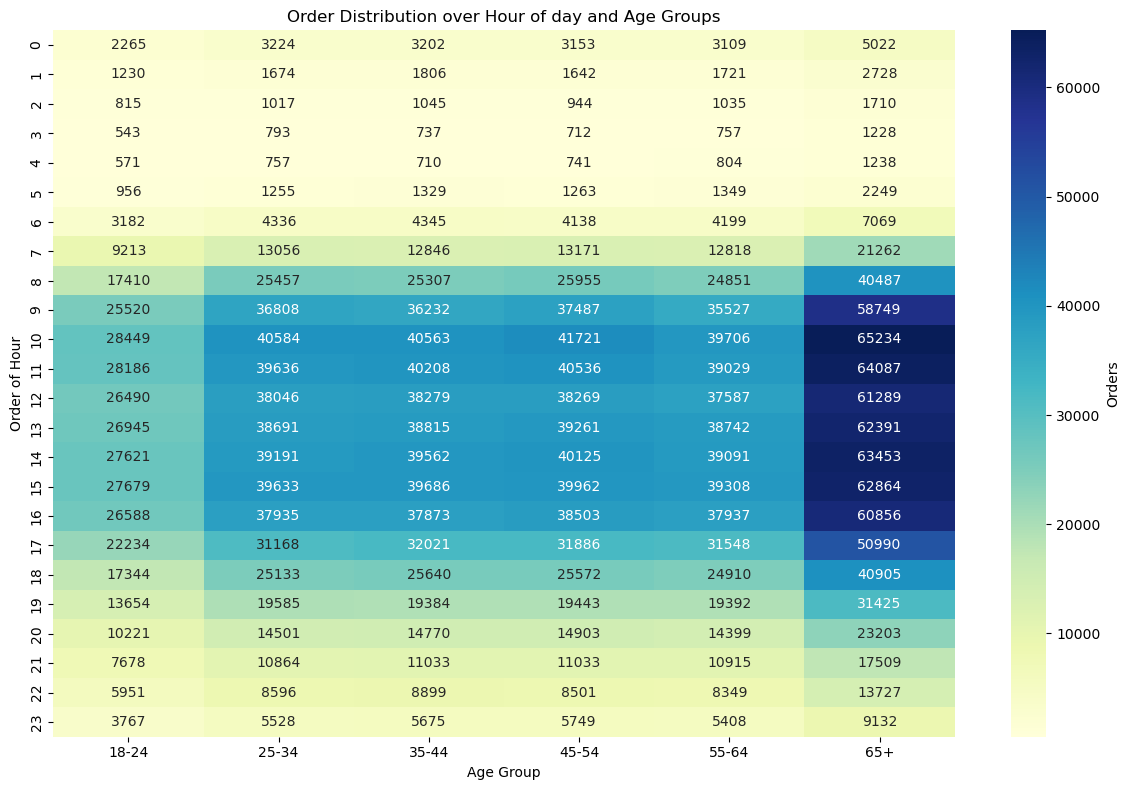

In [195]:
# Create a pivot table with order_dow and age_group
pivot_table = df_orders_products_filtered.pivot_table(
    index='order_hour_of_day', columns='age_group', values='order_id', aggfunc='nunique', fill_value=0
)

# Create a heatmap
plt.figure(figsize=(12, 8))
plt.xticks(rotation = 40, ha = 'right') 
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='g', cbar_kws={'label': 'Orders'})
plt.title('Order Distribution over Hour of day and Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Order of Hour')

plt.tight_layout()

plt.savefig(os.path.join(path, '04 Analysis','Visualization', 'Order_Distribution_Over_Hour_of_day_And_Age_Group_10.8.png'))

plt.show()

## Heat map analysis over the Age group on Order of Hour and Order count 
## Most orders are falling within the hours 8 to 16
## Orders and age group has direct relation

#  Check connection between age and family status in terms of ordering habits

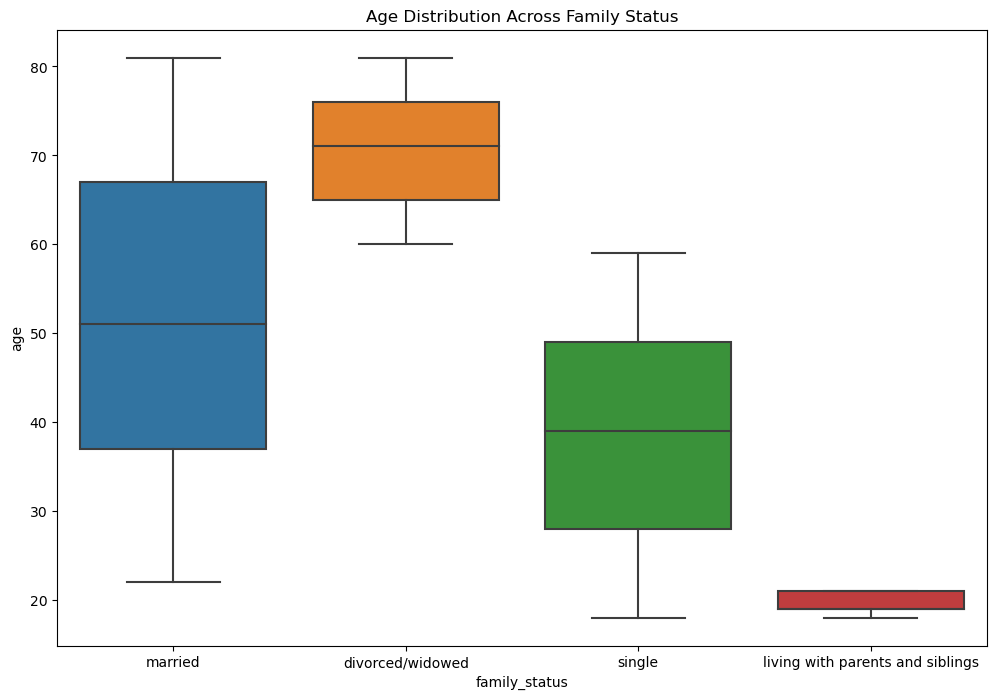

In [10]:
# Create a boxplot or violin plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='family_status', y='age', data=df_orders_products_filtered)
plt.title('Age Distribution Across Family Status')
plt.savefig(os.path.join(path, '04 Analysis','Visualization', 'Age_Distribution_Across_Family_Status_4.10.png'))
plt.show()

In [3]:
df_orders_products_filtered = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_final_4.10.pkl'))

C:\Users\vinor\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vinor\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vinor\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\vinor\AppData\Local\Temp\ipykernel_18100\2607683652.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


TypeError: 'Legend' object is not callable

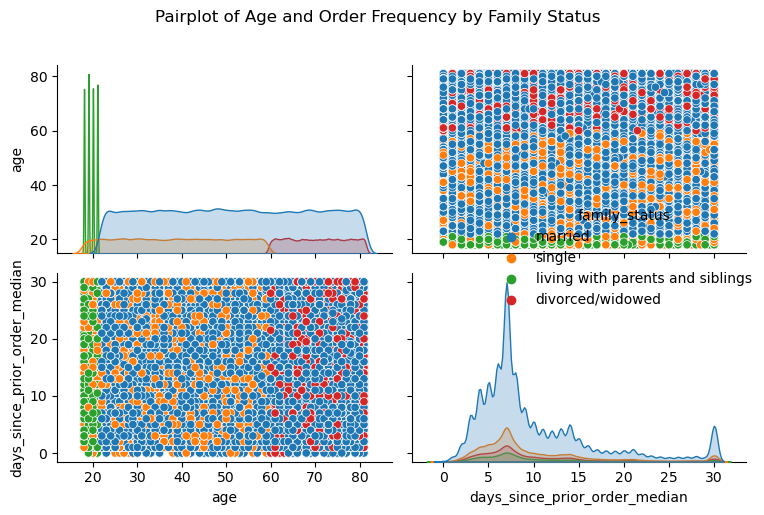

In [15]:
# Subsample 10% of the data
subsample = df_orders_products_filtered.sample(frac=0.1, random_state=42)
# Create a pairplot with the subsampled data
pplot = sns.pairplot(subsample, hue='family_status', vars=['age', 'days_since_prior_order_median'])
pplot.fig.suptitle('Pairplot of Age and Order Frequency by Family Status', y=1.02)
plt.tight_layout()
# Place legend outside the chart area
pplot.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.savefig(os.path.join(path, '04 Analysis','Visualization', 'Pairplot_Age_Order_Frequency_Family_Status_4.10.png'))
plt.show()

C:\Users\vinor\AppData\Local\Temp\ipykernel_18100\1401379441.py:6: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(os.path.join(path, '04 Analysis','Visualization', 'Age_vs_Days_Since_Prior_Order_Median_4.10.png'))
C:\Users\vinor\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


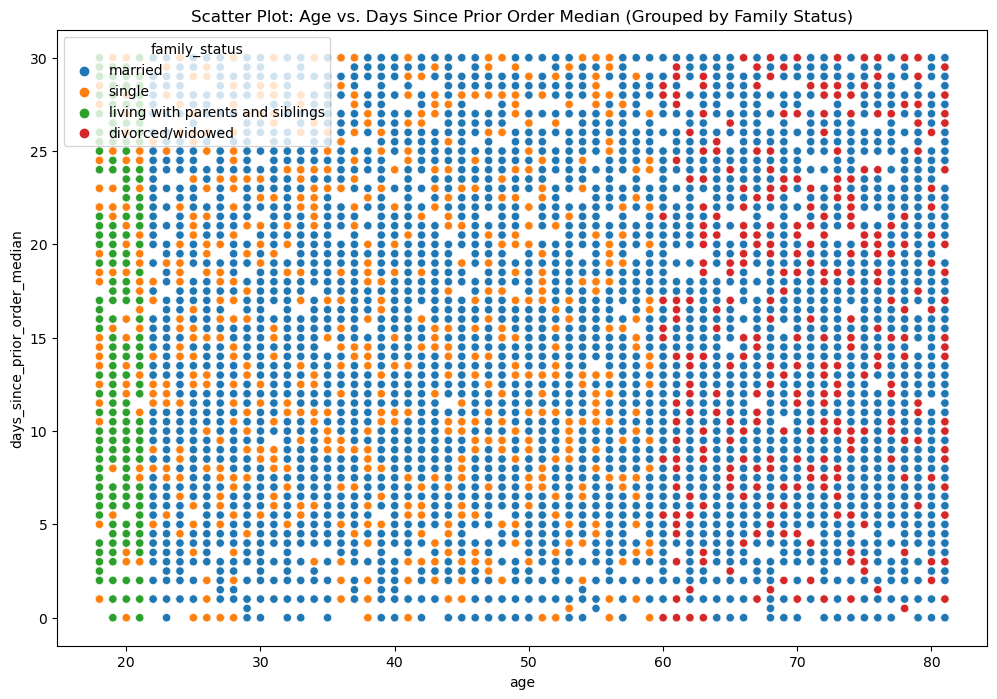

In [4]:
# Scatter plot to visualize the relationship between age, days_since_prior_order_median, and family_status
plt.figure(figsize=(12, 8))
sns.scatterplot(x='age', y='days_since_prior_order_median', hue='family_status', data=subsample)
plt.title('Scatter Plot: Age vs. Days Since Prior Order Median (Grouped by Family Status)')
plt.savefig(os.path.join(path, '04 Analysis','Visualization', 'Age_vs_Days_Since_Prior_Order_Over_Family_Status_4.10.png'))
plt.show()

C:\Users\vinor\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vinor\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vinor\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


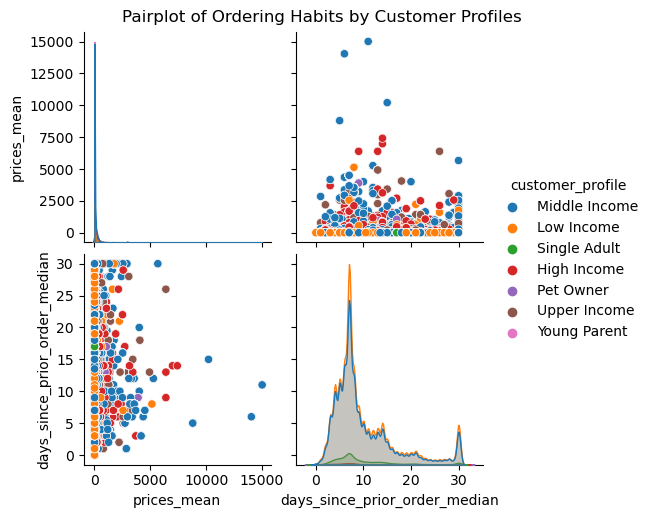

In [11]:
# Create a pairplot
selected_columns = ['prices_mean', 'days_since_prior_order_median', 'department', 'customer_profile']
sns.pairplot(subsample[selected_columns], hue='customer_profile')
plt.suptitle('Pairplot of Ordering Habits by Customer Profiles', y=1.02)
plt.savefig(os.path.join(path, '04 Analysis','Visualization', 'Pairplot_Ordering_Habits_Customer_Profiles_4.10.png'))
plt.show()

# Demographic classification visualisation 

C:\Users\vinor\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vinor\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


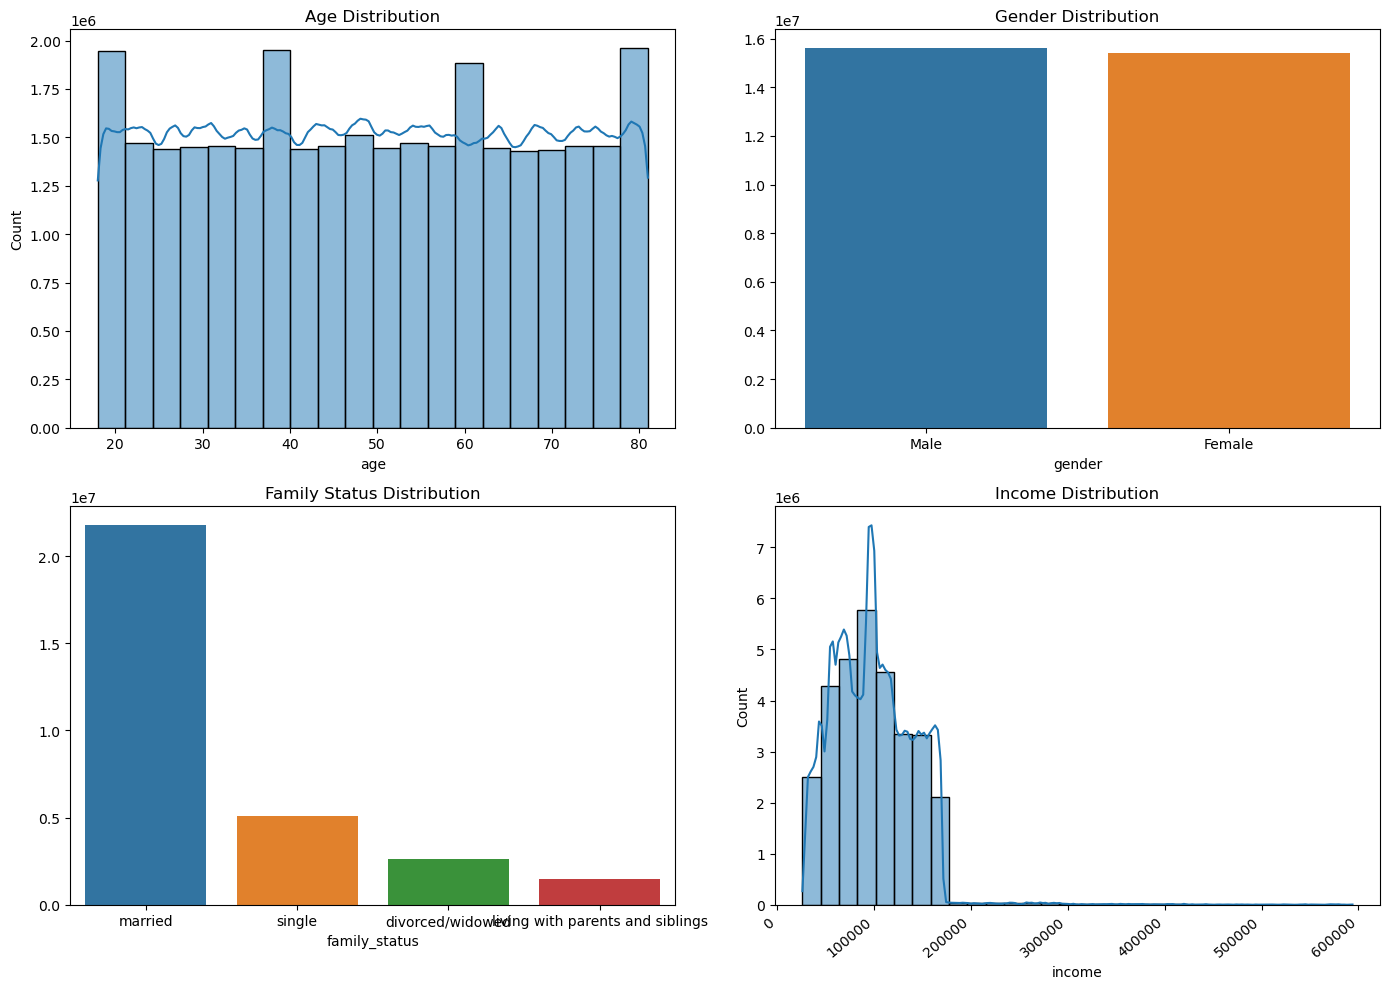

In [9]:
# Aggregate counts for each demographic category
gender_counts = df_orders_products_filtered['gender'].value_counts()
family_status_counts = df_orders_products_filtered['family_status'].value_counts()

# Set up subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
plt.xticks(rotation = 40, ha = 'right') 

# Plot Age distribution
sns.histplot(df_orders_products_filtered['age'], bins=20, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution')

# Plot Gender distribution
sns.barplot(x=gender_counts.index, y=gender_counts.values, ax=axes[0, 1])
axes[0, 1].set_title('Gender Distribution')

# Plot Family Status distribution
sns.barplot(x=family_status_counts.index, y=family_status_counts.values, ax=axes[1, 0])
axes[1, 0].set_title('Family Status Distribution')

# Plot Income distribution
sns.histplot(df_orders_products_filtered['income'], bins=30, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Income Distribution')

# Adjust layout
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis','Visualization', 'Demographic_classificatio_visualisation_4.10.png'))

plt.show()

In [ ]:
# Export Final data frame
df_orders_products_filtered.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_products_final_4.10.pkl'))